# Running a Simple LLM Chat Agent interaction

ORIGINAL POST AT https://iambreno.vercel.app/posts/building-an-ai-agent/

This was build from LangChain [tutorials](https://python.langchain.com/v0.2/docs/tutorials/) and [LLM Open course material](https://github.com/peremartra/Large-Language-Model-Notebooks-Course/tree/main), that are really good and I suggest everyone to play with them!

This Tutorial requires creating API Keys at
- OpenAI (You can Add credits to your balance)
- Tavily (free to use in simple tier 10k web queries)
- LangSmith (free to use)

#### References
- https://python.langchain.com/v0.2/docs/tutorials/chatbot/#jupyter-notebook
- https://github.com/peremartra/Large-Language-Model-Notebooks-Course/tree/main
- https://medium.com/@peremartra/list/large-language-models-practical-course-66b4ce5943ce

In [ ]:
!pip install langchain -qqq
!pip install langchain-openai -qqq
!pip install langchain_community -qqq
!pip install tavily-python -qqq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.6/115.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.5/391.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Setup Tools

First of all we need to setup our API keys, for this tutorial we need to have [OpenAI](https://openai.com/api/) API keys, [Tavily](https://tavily.com/) API Keys and [LangSmith API Keys](https://smith.langchain.com/).

- Open AI will provide us the model to run our code
- Tavily is a Web Scraping API that we will use for our Agent
- LangSmith provides access to tracing capabilities as well as access to the LangChain hub of resources
  - In LangSmith you will create the project and from there you can add it here. The deafult one is `default`.

Open AI you can put credits into your account so there is less chance of a $1000 bill

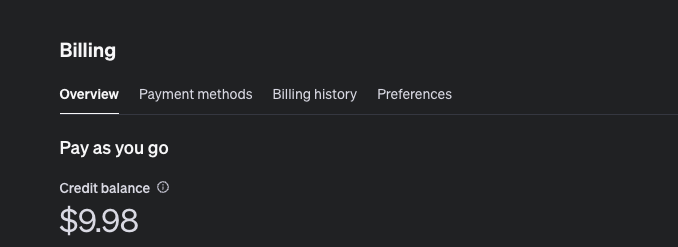

while writting this post I've spent < $0.01

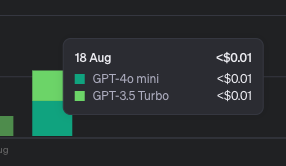

And Tavily has a generous Free tier

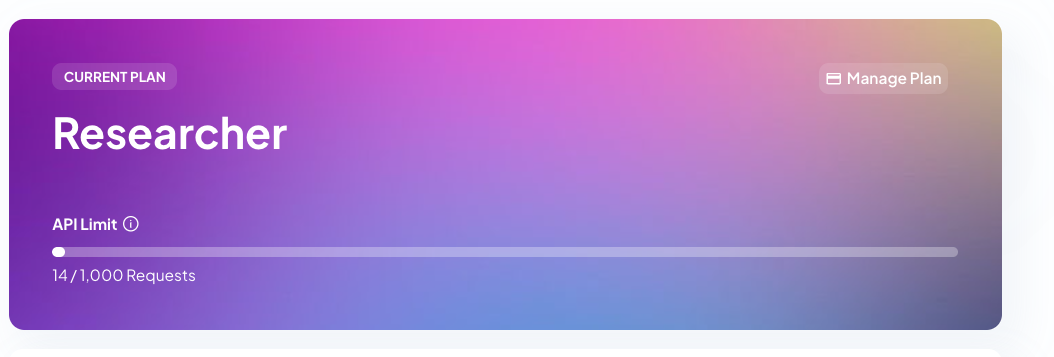

In [ ]:
import getpass
import os

# Recommend using LangSmith as it provides LOTS of Tracing capabilities!

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass(prompt='LangChain API KEY: ')
os.environ["LANGCHAIN_PROJECT"] = getpass.getpass(prompt='LangChain Project: ')
os.environ["OPENAI_API_KEY"] = getpass.getpass(prompt='Open AI API Key: ')
os.environ["TAVILY_API_KEY"] = getpass.getpass(prompt='TAVILY API Key: ')

LangChain API KEY: ··········
LangChain Project: ··········
Open AI API Key: ··········
TAVILY API Key: ··········


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, AIMessage

llm = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
# Test the OpenAPI model

llm.invoke(input="Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'stop', 'logprobs': None}, id='run-98a5962f-73de-4440-a075-12075ebfe65a-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17})

## Defining Tools to Be used

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2)
# If you want to test
# search_results = search.invoke("Simone Biles 2024 Paris Olympic games medals count")
# print(search_results)

# If you want to add more tools you can see the available tools in https://python.langchain.com/v0.1/docs/integrations/tools/
tools = [search]


In [ ]:
# test the tavily search and its response structure

search.run("Simone Biles 2024 Paris Olympic games medals count")

[{'url': 'https://olympics.com/en/news/simone-biles-all-titles-records-and-medals-complete-list-paris-2024',
  'content': "U.S. gymnastics superstar Simone Biles already owns more world and Olympic medals than any gymnast in history. The 27-year-old is the owner of 10 Olympic medals, including seven golds, and 30 world medals - 23 of which are gold. At the Olympic Games Paris 2024, the American has the chance to add up to two medals to her haul, having helped Team USA to gold in the women's final and taking the ..."},
 {'url': 'https://www.usatoday.com/story/sports/olympics/2024/07/28/simone-biles-how-many-olympics-appearances/74230944007/',
  'content': "The 2024 Paris Olympics are Simone Biles' third Olympic Games and she seems poised to add to her already-impressive medal count. ... Biles has competed in two other Olympic Games: the 2016 Rio ..."}]

## Create the AI Agent

In [ ]:
from langchain.agents import create_react_agent
from langchain.chains.conversation.memory import ConversationBufferWindowMemory
from langchain import hub
from langchain.agents import AgentExecutor

# Creating a memory for the Agent over a Chat interface, so if we call the agent it will remember the last messages

conversational_memory = ConversationBufferWindowMemory(
    memory_key='chat_history',
    k=4, # Number of messages stored in memory
    return_messages=True # Must return the messages in the response.
)

# Load prompt template, this creates a template in which Langchain will format the messages into to sent to the model.

## Must have a langchain key to fetch resources from the langchain hub.
prompt = hub.pull("hwchase17/react-chat") # https://smith.langchain.com/hub/hwchase17/react-chat?organizationId=c005d9c3-9654-5134-8ec9-122b5a609562
agent = create_react_agent(
    tools=tools,
    llm=llm,
    prompt=prompt,
)

# Create an agent executor by passing in the agent and tools

agent_executor = AgentExecutor(agent=agent, # The Base Agent, a ReAct agent
                               tools=tools, # Set of tools provided to the Agent Executor
                               verbose=True, # Verbosity to help understand and debug
                               memory=conversational_memory, # The memory for context in the LLM and history
                               max_iterations=5, # An Agent can loop itself using different Tools to get a Job done, this limits the max interactions to 5
                               max_execution_time=600, # During this interactions we can add a timeout during one interaction
                               handle_parsing_errors=True
                               )


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


## Make the query

In [ ]:
agent_executor.invoke({"input": "How many medals Simone Biles got in the 2024 Paris olympics?"})['output']



> Entering new AgentExecutor chain...
```
Thought: Do I need to use a tool? Yes
Action: tavily_search_results_json
Action Input: "Simone Biles medals 2024 Paris Olympics"
```[{'url': 'https://people.com/simone-biles-wins-four-medals-2024-olympics-8690143', 'content': "Simone Biles Ends Her 2024 Olympic Games with Four Medals: 'I've Accomplished Way More Than My Wildest Dreams'. Biles finished out her Paris Olympics with a silver medal in the individual floor ..."}, {'url': 'https://olympics.com/en/news/simone-biles-all-titles-records-and-medals-complete-list-paris-2024', 'content': "U.S. gymnastics superstar Simone Biles already owns more world and Olympic medals than any gymnast in history. The 27-year-old is the owner of 10 Olympic medals, including seven golds, and 30 world medals - 23 of which are gold. At the Olympic Games Paris 2024, the American has the chance to add up to two medals to her haul, having helped Team USA to gold in the women's final and taking the ..."}]Do I nee

"Simone Biles won a total of four medals at the 2024 Paris Olympics, including a silver medal in the individual floor exercise and gold medals with Team USA in the women's final."

As you can see if follows the same structure

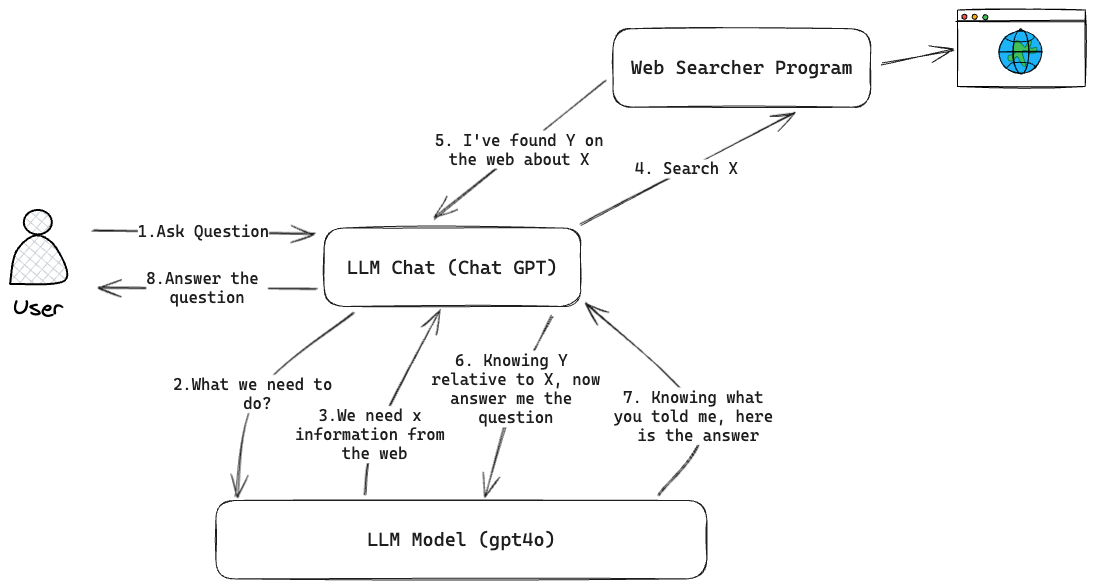

In [ ]:
# Here a custom invoker that you can type into to ask!

agent_executor.invoke({"input": input('Message: ')})['output']

Message: Tell me about the latest earnings call from Nubank


> Entering new AgentExecutor chain...
```
Thought: Do I need to use a tool? Yes
Action: tavily_search_results_json
Action Input: latest earnings call from Nubank
```
[{'url': 'https://www.businesswire.com/news/home/20240813174247/en/Nu-Holdings-Ltd.-Reports-Second-Quarter-2024-Financial-Results', 'content': 'CONFERENCE EARNINGS CALL DETAILS Nu will hold a Conference Earnings Call today at 6:00pm Eastern time/7:00pm Brasília time with ... please visit https://international.nubank.com.br/about ...'}, {'url': 'https://international.nubank.com.br/company/nu-holdings-ltd-reports-third-quarter-2023-financial-results/', 'content': 'Although the Company believes that these estimates and forward-looking statements are based upon reasonable assumptions, they are subject to several risks and uncertainties and are made in light of information currently available, and actual results may differ materially from those expressed or implied i

{'input': 'Tell me about the latest earnings call from Nubank',
 'chat_history': [HumanMessage(content='How many medals Simone Biles got in the 2024 Paris olympics?'),
  AIMessage(content='Simone Biles won a total of four medals at the 2024 Paris Olympics, including a silver medal in the individual floor event and a gold medal in the vault.'),
  HumanMessage(content='How many medals Simone Biles got in the 2024 Paris olympics?'),
  AIMessage(content='Simone Biles won a total of four medals at the 2024 Paris Olympics, including a silver medal in the individual floor event and a gold medal in the vault.')],
 'output': "Nubank recently held its earnings call for the third quarter of 2023 on November 14, 2023. During the call, CEO David Vélez highlighted that the company is achieving strong levels of profitability while maintaining asset quality and continuing to invest in its product portfolio and geographic expansion. The earnings report includes financial and operational highlights, sho

# Debug and Monitoring with LangSmith

If we see the LangSmith Tracing and steps we can see how it reasons about data!

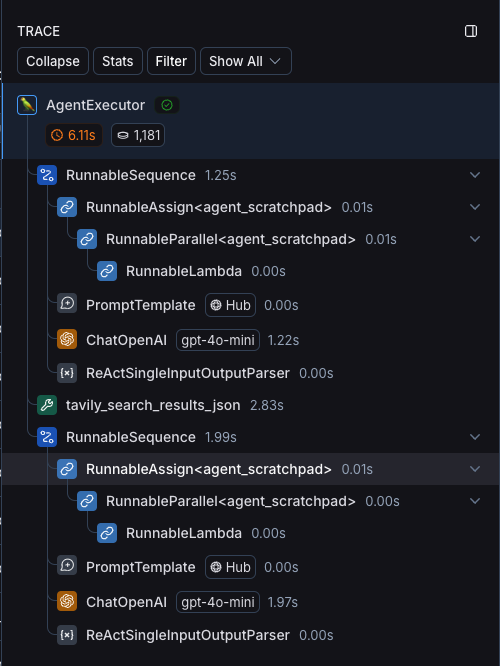

In this case it creates a Prompt to Open AI using the Prompt Template then from the response it knows it need to query the web.

From there it get the results and send back to the LLM

It also shows the total cost of my operation

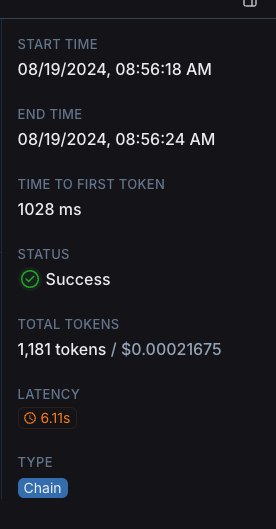